In [1]:
!pip install dimod
!pip install 'qiskit[all]'
!pip install dwave-neal

     |████████████████████████████████| 210 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 142 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 5.2 MB/s s eta 0:00:01


     |████████████████████████████████| 404 kB 2.1 MB/s eta 0:00:01


In [2]:
!pip install qiskit-aer-gpu
!pip install gsgmorph

     |████████████████████████████████| 26.7 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 884 kB 3.0 MB/s eta 0:00:01
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)


In [3]:
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.algorithms.optimizers import COBYLA, SLSQP, ADAM
from qiskit_optimization import QuadraticProgram
from docplex.mp.model import Model

In [4]:
from qiskit.optimization.applications.ising import stable_set
from qiskit import Aer
from qiskit.optimization.applications.ising import stable_set
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver, QAOA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

/home/akashk/.local/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/akashk/.local/lib/python3.8/site-packages/qiskit/optimization/__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


In [5]:
!lspci -v

00:00.0 Host bridge: Intel Corporation Xeon E3-1200 v6/7th Gen Core Processor Host Bridge/DRAM Registers (rev 05)
	Subsystem: ASRock Incorporation Xeon E3-1200 v6/7th Gen Core Processor Host Bridge/DRAM Registers
	Flags: bus master, fast devsel, latency 0
	Capabilities: <access denied>
	Kernel driver in use: skl_uncore

00:02.0 VGA compatible controller: Intel Corporation HD Graphics 630 (rev 04) (prog-if 00 [VGA controller])
	Subsystem: ASRock Incorporation HD Graphics 630
	Flags: bus master, fast devsel, latency 0, IRQ 128
	Memory at de000000 (64-bit, non-prefetchable) [size=16M]
	Memory at c0000000 (64-bit, prefetchable) [size=256M]
	I/O ports at f000 [size=64]
	Expansion ROM at 000c0000 [virtual] [disabled] [size=128K]
	Capabilities: <access denied>
	Kernel driver in use: i915
	Kernel modules: i915

00:14.0 USB controller: Intel Corporation 100 Series/C230 Series Chipset Family USB 3.0 xHCI Controller (rev 31) (prog-if 30 [XHCI])
	Subsystem: ASRock Incorporation 100 Series/C230 Ser

In [6]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 2.0 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-experiments 0.1.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.


In [7]:
import gsgmorph.matrix_form as gsgm_mf
import networkx as nx

graph_to_embed = nx.Graph([(1,2),(1,3),(2,3),(2,4),(4,5),(5,3)])
target_graph = nx.Graph([('a','b'),('a','c'),('b', 'c'), ('b', 'd'), ('d', 'e'), ('e', 'c')])

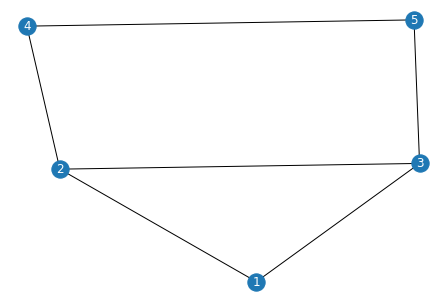

In [8]:
# Get fixed position
pos = nx.spring_layout(graph_to_embed, seed=9999)

# Graph to be embedded onto a target graph
nx.draw(graph_to_embed, pos, with_labels=True, font_color='w')

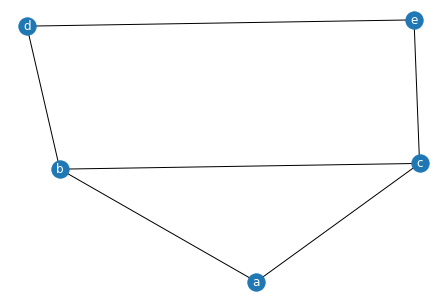

In [9]:
# Get fixed position
pos = nx.spring_layout(target_graph, seed=9999)

# Target graph, the above graph will be mapped to this one
nx.draw(target_graph, pos, with_labels=True, font_color='w')

In [10]:
# Obtain the QUBO and the sample translation dictionary
Q, sample_translation_dict = gsgm_mf.graph_isomorphism(graph_to_embed, target_graph)

In [11]:
# Put the QUBO on the annealer and obtain the lowest energy solution.
# NOTE: It is possible to have multiple acceptable solutions!
import neal
sampler = neal.SimulatedAnnealingSampler()
sampleset = sampler.sample_qubo(Q, num_reads=100)
sampleset = sampleset.aggregate()
best_sample = sampleset.first

In [12]:
best_sample

Sample(sample={0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1}, energy=-10.0, num_occurrences=34)

In [13]:
gsgm_mf.translate_sample(best_sample, sample_translation_dict)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}

In [14]:
# Akash's code
s = neal.SimulatedAnnealingSampler()
sampleset = s.sample_qubo(Q, beta_range=(5, 100), num_sweeps=20000, num_reads=100,
                        beta_schedule_type='geometric')

In [15]:
# energies = []
# for datum in sampleset.data(fields=["sample", "energy"]):
#     energies.append(datum.energy)

# print(offset)
# print(energies+offset)

In [15]:
# We can use an annealing sample and the sample translation dictionary from before to
# generate a dictionary that maps nodes from the graph to be embedded to the target graph
mapping = gsgm_mf.translate_sample(best_sample, sample_translation_dict)

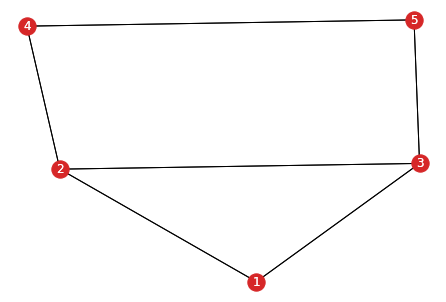

In [16]:
# We can use NetworkX to help us visualize the subgraph and how it maps to the target graph

# Invert the mapping so it is from the target graph TO the graph to embed nodes
# Snippet taken from: 
# https://stackoverflow.com/a/483833
inv_mapping = {v: k for k, v in mapping.items()}

# relabel the nodes in the target graph with the node labels from the graph to embed
updated_nodes = nx.relabel_nodes(target_graph, inv_mapping, copy=True)
# Get the same fixed position used before
pos = nx.spring_layout(updated_nodes, seed=9999)

# Highlight the nodes that have been relabeled
nx.draw(updated_nodes, pos, with_labels=True, 
        font_color='w', 
        nodelist=[key for key in mapping.keys()], 
        node_color="tab:red")

# Difference between two lists:
# https://stackoverflow.com/a/3462160
nx.draw(updated_nodes, 
        pos, 
        with_labels=True, 
        font_color='w', 
        nodelist=list(set(updated_nodes.nodes()) - set(mapping.keys())), 
        node_color="tab:blue")

In [17]:
import numpy as np

def build_matrix(data):
    data = dict(data)

    maxX = max([x for (x, y) in list(data.keys())])
    maxY = max([y for (x, y) in list(data.keys())])

    maxX = max([maxX, maxY])
    maxY = max([maxX, maxY])

    mat = np.zeros(shape=(maxX+1, maxY+1))

    for key, value in data.items():
        x, y = key
        mat[x][y] = value

    return mat

Q_mat = build_matrix(Q)

In [18]:
# Q_mat

In [19]:
s = neal.SimulatedAnnealingSampler()
sampleset = s.sample_qubo(Q, beta_range=(5, 100), num_sweeps=20000, num_reads=100,
                        beta_schedule_type='geometric')

In [20]:
# Post processing

# Offset is empirically calculated as of now. 
# From preliminary experiments, the offset is 
# calculated to be 2 * number of nodes of the 
# graph

offset = 2.0 * len(graph_to_embed.nodes)

energies = []
final_energies = []
for datum in sampleset.data(fields=["sample", "energy"]):
    energies.append(datum.energy)

print(offset)
for energy in energies: 
  final_energy = float(energy) + float(offset)
  final_energies.append(final_energy)

10.0


In [21]:
final_energies

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [23]:
# qubitOp, offset = stable_set.get_operator(Q_mat)
# print('Offset:', offset)
# print('Ising Hamiltonian:')
# print(qubitOp.print_details())

In [24]:
# # mapping Ising Hamiltonian to Quadratic Program
# qp = QuadraticProgram()
# qp.from_ising(qubitOp, offset)
# qp.to_docplex().prettyprint()


In [22]:
from qiskit.providers.aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

"Invalid simulation device GPU. Available devices are: ['CPU']"


In [23]:
import numpy as np

from qiskit import Aer
from qiskit.optimization.applications.ising import stable_set
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver, QAOA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram


w = Q_mat

qubitOp, offset = stable_set.get_operator(w)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

# mapping Ising Hamiltonian to Quadratic Program
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset)
qp.to_docplex().prettyprint()

aqua_globals.random_seed = np.random.default_rng(123)
seed = 1097
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(simulator_gpu, seed_simulator=seed, seed_transpiler=seed)

qaoa = QAOA(quantum_instance=quantum_instance, p = 5)

# create minimum eigen optimizer based on qaoa
qaoa_optimizer = MinimumEigenOptimizer(qaoa)

# solve quadratic program
result = qaoa_optimizer.solve(qp)
print(result)

/home/akashk/.local/lib/python3.8/site-packages/qiskit/optimization/applications/ising/stable_set.py:60: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  return WeightedPauliOperator(paulis=pauli_list), shift - num_nodes / 2


Offset: 61.5
Ising Hamiltonian:
IIIIIIIIIIIIIIIIIIIIIIIZZ	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIIIZIZ	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIIZIIZ	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIZIIIZ	(0.5+0j)
IIIIIIIIIIIIIIIIIIIZIIIIZ	(0.5+0j)
IIIIIIIIIIIIIIIIZIIIIIIIZ	(0.5+0j)
IIIIIIIIIIIIIIIZIIIIIIIIZ	(0.5+0j)
IIIIIIIIIIIIIIZIIIIIIIIIZ	(0.5+0j)
IIIIIIIIIIIZIIIIIIIIIIIIZ	(0.5+0j)
IIIIIIIIIIZIIIIIIIIIIIIIZ	(0.5+0j)
IIIIIIIIIZIIIIIIIIIIIIIIZ	(0.5+0j)
IIIIZIIIIIIIIIIIIIIIIIIIZ	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIIIZZI	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIIZIZI	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIZIIZI	(0.5+0j)
IIIIIIIIIIIIIIIIIIZIIIIZI	(0.5+0j)
IIIIIIIIIIIIIIIZIIIIIIIZI	(0.5+0j)
IIIIIIIIIIIIIZIIIIIIIIIZI	(0.5+0j)
IIIIIIIIIIZIIIIIIIIIIIIZI	(0.5+0j)
IIIIIIIIZIIIIIIIIIIIIIIZI	(0.5+0j)
IIIZIIIIIIIIIIIIIIIIIIIZI	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIIZZII	(0.5+0j)
IIIIIIIIIIIIIIIIIIIIZIZII	(0.5+0j)
IIIIIIIIIIIIIIIIIZIIIIZII	(0.5+0j)
IIIIIIIIIIIIIIIIZIIIIIZII	(0.5+0j)
IIIIIIIIIIIIZIIIIIIIIIZII	(0.5+0j)
IIIIIIIIIIIZIIIIIIIIIIZII	(0.5+0j)
IIIIIIIZIIIIIIIIIIIIIIZ

<ipython-input-23-10440af78d75>:25: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  aqua_globals.random_seed = np.random.default_rng(123)
/home/akashk/.local/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
/home/akashk/.local/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For 

KeyboardInterrupt: 